## BRUNO IZIDORO CURY
___

## O IMPACTO DA RELAÇÃO COM A TECNOLOGICA EM PESSOAS DE TERCEIRA IDADE

___
## Introdução
Cada dia fica mais clara a velocidade da progressão da tecnologia no pais e no mundo. Os jovens de hoje em dia já nasceram em um mundo completamente digital e, por isso, tem uma grande facilidade para entender e manusear tais tecnologias.
A questão que desejo investigar neste trabalho é a relação de pessoas que não nasceram nesta era digital com a tecnologia. Pessoas da terceira idade além de não terem facilidade, no geral, possuem uma “deficiência eletrônica”, isso é, falta-lhes um traquejo na hora de lidar com novas tecnologias digitais.
Minha intenção com este projeto é mensurar o traquejo e o interesse de pessoas da terceira idade com a tecnologia, e, por meio dessas informações, tomar a decisão de implementar ou não um projeto para familiarizar essas pessoas para com o uso de tecnologias; e assim torna-los mais independentes e melhorar a qualidade de vida das mesmas.

___
# Ciência dos Dados - PROJETO 1

___
## Filtros da base de dados

In [1]:
%reset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Dados2015 = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
Dados2011 = pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

Esperamos trabalhar no diretório
C:\Users\Bruno\Documents\INSPER_DP2\CIENCIA_DADOS\Projeto1


Na próxima sessão de código eu selecionarei as variáveis necessárias para análise e criarei duas variáveis:
A primeira variável a ser criada será “UTILIZOU_iNTERNET_NO_ANO” que indica se o individuo utilizou internet ou não em doze meses, a criação dessa variável foi feita através da soma dos acessos a internet por todos os veículos disponíveis na PNAD2015. A segunda variável a ser criada será “VEICULO_DE_ACESSO” para caracterizar por que veiculo foi realizado o acesso à internet.
Além de criar novas variáveis também renomearemos o output de todas as variáveis para que,  ao invés de retornarem números,passarão a rerornar strings de minha escolha que representam as respostas reais da PNAD2015.


In [21]:
#REDUZINDO O DATAFRAME E SELECIONANDO AS VARIÁVEIS A SEREM TRABALHADAS

DataFrame = pd.DataFrame()
DataFrame["IDADE"] = Dados2015["V8005"]
DataFrame["SEXO"] = Dados2015["V0302"]
DataFrame["CELULAR"] = Dados2015["V06112"]
DataFrame["ENTROU_NA_NET_EM_ALGUM_LOCAL"] = Dados2015["V061111"]
DataFrame["ACESSO_VIA_PC"] = Dados2015["V061112"]
DataFrame["ACESSO_VIA_CEL"] = Dados2015["V061113"]
DataFrame["ACESSO_VIA_TABLET"] = Dados2015["V061114"]
DataFrame["RENDA_MENSAL"] = Dados2015["V9532"]
DataFrame["POSICAO_FAMILIAR"] = Dados2015["V0401"]
DataFrame["ACESSO_VIA_OUTRO_APARELHO"] = Dados2015["V061116"]

#CRIANDO NOVAS VARIÁVEIS IMPORTANTES PARA ANÁLISE

def PH(DataFrame):
    a = DataFrame.ACESSO_VIA_CEL
    b = DataFrame.ACESSO_VIA_PC
    c = DataFrame.ACESSO_VIA_TABLET
    d = DataFrame.ACESSO_VIA_OUTRO_APARELHO
    e = DataFrame.ENTROU_NA_NET_EM_ALGUM_LOCAL
    if (a==1 or b==1 or c==1 or d==1 or e==1): return "Sim"
    else: return "Nao"

Acesso = DataFrame.apply(PH,axis=1)
DataFrame["UTILIZOU_iNTERNET_NO_ANO"] = Acesso



def VEICULO_DE_ACESSO(DataFrame):
    a = DataFrame.ACESSO_VIA_CEL
    b = DataFrame.ACESSO_VIA_PC
    c = DataFrame.ACESSO_VIA_TABLET
    d = DataFrame.ACESSO_VIA_OUTRO_APARELHO
    e = DataFrame.ENTROU_NA_NET_EM_ALGUM_LOCAL
    if a == 1: return 1 
    elif b == 1: return 2
    elif c == 1: return 3
    elif d == 1: return 4
    elif e == 1: return 5
    return 6

Acesso = DataFrame.apply(VEICULO_DE_ACESSO,axis=1)
DataFrame["VEICULO_DE_ACESSO"] = Acesso


#CATEGORIZANDO E RENOMEANDO OS OUTPUTS DAS VARIÁVEIS ESCOLHIDAS 

DataFrame.SEXO = DataFrame.SEXO.astype("category")
DataFrame.CELULAR = DataFrame.CELULAR.astype("category")
DataFrame.ENTROU_NA_NET_EM_ALGUM_LOCAL = DataFrame.ENTROU_NA_NET_EM_ALGUM_LOCAL.astype("category")
DataFrame.ACESSO_VIA_PC = DataFrame.ACESSO_VIA_PC.astype("category")
DataFrame.ACESSO_VIA_CEL = DataFrame.ACESSO_VIA_CEL.astype("category")
DataFrame.ACESSO_VIA_TABLET = DataFrame.ACESSO_VIA_TABLET.astype("category")
DataFrame.ACESSO_VIA_OUTRO_APARELHO = DataFrame.ACESSO_VIA_OUTRO_APARELHO.astype("category")
DataFrame.VEICULO_DE_ACESSO = DataFrame.VEICULO_DE_ACESSO.astype("category")

DataFrame.SEXO.cat.categories=(["Masculino","Feminino"])
DataFrame.CELULAR.cat.categories=(["Tem celular","Nao tem celular"])
DataFrame.ENTROU_NA_NET_EM_ALGUM_LOCAL.cat.categories=(["Sim","Nao"])
DataFrame.ACESSO_VIA_PC.cat.categories=(["Sim","Nao"])
DataFrame.ACESSO_VIA_CEL.cat.categories=(["Sim","Nao"])
DataFrame.ACESSO_VIA_TABLET.cat.categories=(["Sim","Nao"])
DataFrame.ACESSO_VIA_OUTRO_APARELHO.cat.categories=(["Sim","Nao"])
DataFrame.VEICULO_DE_ACESSO.cat.categories = (["ACESSOU VIA CEL","ACESSOU VIA PC","ACESSOU VIA TABLET","ACESSOU VIA OUTRO APARELHO","UTILIZOU NET EM ALGUM LOCAL","NAO"])

#CRIANDO FAIXAS PARA A RENDA MENSAL

FaixasRenda = arange(5,5000,200)
RENDAcat = pd.cut(DataFrame.RENDA_MENSAL,bins = FaixasRenda,right = True)
ut1 = (RENDAcat.value_counts(sort=False, normalize=True)*100).round(decimals=1)



In [23]:
DataFrame.RENDA_MENSAL.describe()

count    1.543850e+05
mean     1.353759e+10
std      1.155613e+11
min      5.000000e+00
25%      7.880000e+02
50%      1.125000e+03
75%      2.000000e+03
max      1.000000e+12
Name: RENDA_MENSAL, dtype: float64

## Análise e Resultados

Para toda a análise foram interpretados como idosos todos aqueles que tem 60 anos ou mais e foram interpretados jovens todos aqueles com 40 anos ou menos.
Para iniciar minha análise de dados, farei uma sondagem para checar a porcentagem de idosos que acessam a internet pelo menos uma vez por ano e então compara-las com as porcentagens de jovens que utilizaram a internet pelo menos uma vez em 12 meses.

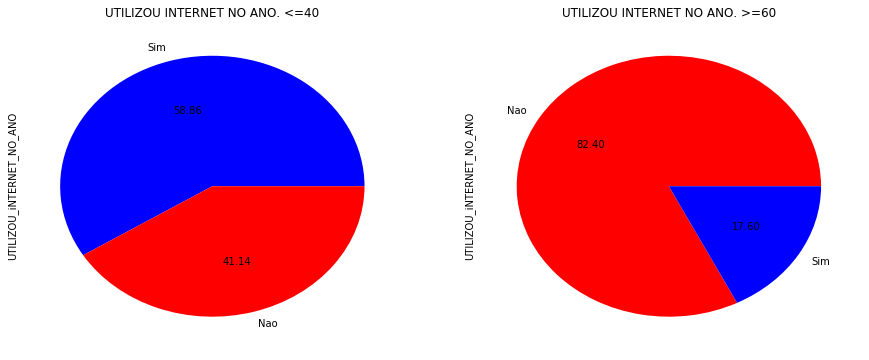

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

INTERNET_NOVOS = DataFrame.UTILIZOU_iNTERNET_NO_ANO[DataFrame.IDADE<=40].value_counts()
INTERNET_NOVOS.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False,ax = axes[0],figsize = (15,6),title = "UTILIZOU INTERNET NO ANO. <=40")

INTERNET_VELHOS = DataFrame.UTILIZOU_iNTERNET_NO_ANO[DataFrame.IDADE>=60].value_counts()
INTERNET_VELHOS.plot(kind='pie', colors=('red', 'blue'), autopct="%0.2f",legend=False,ax = axes[1],figsize = (15,6),title = "UTILIZOU INTERNET NO ANO. >=60")

Os acessos estão representados pela área azul do gráfico e a ausência de acessos pela área vermelha.Pode se observar que a uma grande diferença entre o índice de acesso de jovens e de idosos, o que já era relativamente esperado, porém somente 17% dos idosos fazem uso da internet o que pode indicar uma necessidade real para a implementação de um programa. 
Para julgar se é necessária a implementação de uma politica de familiarização para com a tecnologia precisamos entender melhor os idosos e jovens que acessam, de fato, a internet. 

Com isso em mente os seguintes gráficos foram plotados:


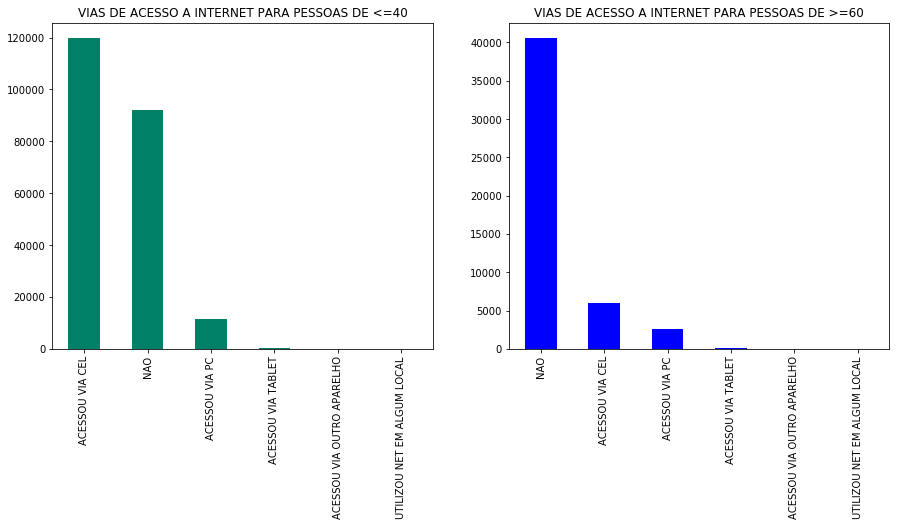

In [22]:
ACESSO_NOVOS = DataFrame.VEICULO_DE_ACESSO[DataFrame.IDADE<=40].value_counts()
ACESSO_VELHOS = DataFrame.VEICULO_DE_ACESSO[DataFrame.IDADE>=60].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2 )

ACESSO_NOVOS.plot(kind='bar', colormap = "summer", legend=False,ax = axes[0],figsize = (15,6),title = "VIAS DE ACESSO A INTERNET PARA PESSOAS DE <=40")

ACESSO_VELHOS.plot(kind='bar', colormap = "winter", legend=False,ax = axes[1],figsize = (15,6),title = "VIAS DE ACESSO A INTERNET PARA PESSOAS DE >=60")

Nos dois gráficos acima estou caracterizando os acessos mais a fundo, começamos agora a conhecer um pouco mais sobre as pessoas que utilizam a internet; é claro agora que o meio principal utilizado para navegar na internet é o celular, tanto para idosos, quanto para jovens. Isso traz uma indagação importante: será que idosos não acessam mais a internet por não possuírem um telefone celular, ou não o fazem por não possuir um celular que consiga acessar a internet como um smartphone.
Para resolver esta dúvida vamos analisar mais a fundo o acesso e posse de celulares, tanto para idosos quanto para jovens.


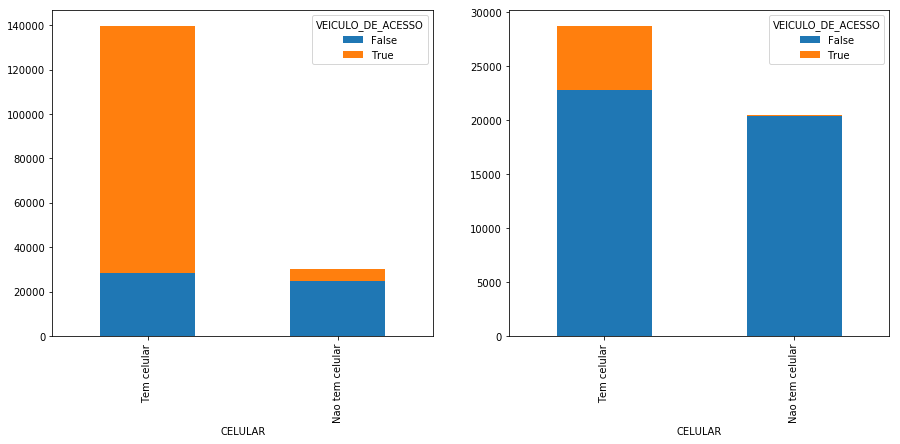

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

CROSS_NOVOS_CEL = pd.crosstab(DataFrame.CELULAR[DataFrame.IDADE<=40],DataFrame[DataFrame.IDADE<40].VEICULO_DE_ACESSO == "ACESSOU VIA CEL")
CROSS_NOVOS_CEL.plot(kind="bar",stacked = True,ax = axes[0],figsize = (15,6))

CROSS_VELHOS_CEL = pd.crosstab(DataFrame.CELULAR[DataFrame.IDADE>=60],DataFrame[DataFrame.IDADE>=60].VEICULO_DE_ACESSO == "ACESSOU VIA CEL")
CROSS_VELHOS_CEL.plot(kind="bar",stacked = True,ax = axes[1],figsize = (15,6))

Nos dois gráficos acima quis analisar se a porcentagem de idosos que tem celular é drasticamente menor do que a de jovens. Para fazer isso plotei uma crosstab de posse de celulares com acesso a internet via celular, e o que se pode observar é que temos aproximadamente o mesmo número de jovens sem celular e idosos com celular, ainda é possível observar que, a grande maioria dos idosos que possuem celulares não acessam a internet pelos mesmos, mesmo este sendo seu maior meio de acesso a internet. Isso me levou a pensar que pessoas da terceira idade talvez não fossem interessadas o bastante em tecnologia para gastar mais dinheiro em um smartphone, ao invés de adquirir um aparelho mais simples. Se isso for verdade, existe uma chance de que a politica de familiarização com a tecnologia falhasse mesmo se implementada, por uma falta de interesse do público alvo.
Para validar este pensamento plotarei os seguintes histogramas:


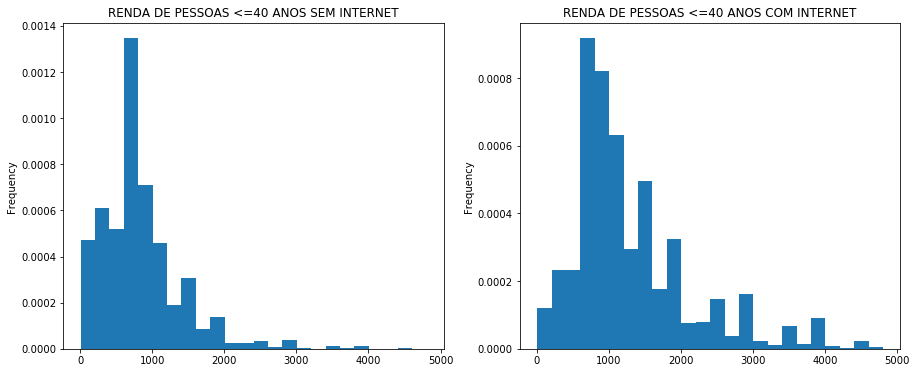

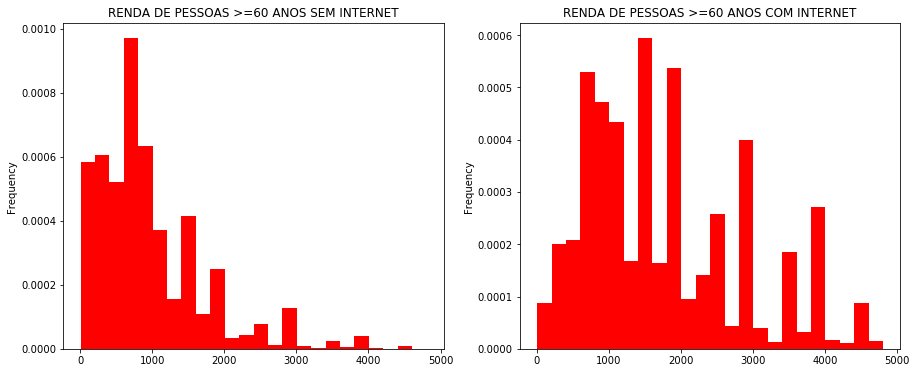

In [20]:
NOVOS_RENDA_SEM_NET = DataFrame.RENDA_MENSAL[(DataFrame.IDADE<=40)&(DataFrame.VEICULO_DE_ACESSO == "NAO")]
NOVOS_RENDA_COM_NET = DataFrame.RENDA_MENSAL[(DataFrame.IDADE<=40)&(DataFrame.VEICULO_DE_ACESSO != "NAO")]


VELHOS_RENDA_SEM_NET = DataFrame.RENDA_MENSAL[(DataFrame.IDADE>=60)&(DataFrame.VEICULO_DE_ACESSO == "NAO")]
VELHOS_RENDA_COM_NET = DataFrame.RENDA_MENSAL[(DataFrame.IDADE>=60)&(DataFrame.VEICULO_DE_ACESSO != "NAO")]


fig, axes = plt.subplots(nrows=1, ncols=2 )

NOVOS_RENDA_SEM_NET.plot.hist(bins = FaixasRenda,ax = axes[0],figsize = (15,6),normed = 1,title = "RENDA DE PESSOAS <=40 ANOS SEM INTERNET")
NOVOS_RENDA_COM_NET.plot.hist(bins = FaixasRenda,ax = axes[1],figsize = (15,6),normed = 1,title = "RENDA DE PESSOAS <=40 ANOS COM INTERNET")

fig, axes = plt.subplots(nrows=1, ncols=2 )

VELHOS_RENDA_SEM_NET.plot.hist(bins = FaixasRenda,ax = axes[0],figsize = (15,6),normed = 1,color = "r",title = "RENDA DE PESSOAS >=60 ANOS SEM INTERNET")
VELHOS_RENDA_COM_NET.plot.hist(bins = FaixasRenda,ax = axes[1],figsize = (15,6),normed = 1,color = "r",title = "RENDA DE PESSOAS >=60 ANOS COM INTERNET")

Nos histogramas acima estão evidenciadas as rendas de jovens e idosos que fizeram acesso a internet no ano e jovens e idosos que não o fizeram. Podemos observar uma grande semelhança entre os histogramas de jovens e idosos que não acessam a internet, os dois apresentam uma concentração grande de dados no lado esquerdo em torno do número mil evidenciando uma renda baixa, próxima a renda dos 25% que menos ganham no Brasil, com o gráfico dos idosos mostrando uma concentração um pouco maior do lado direito que, toda via, não representa o conjunto. Já na análise do segundo gráfico as coisas ficam mais interessantes, ao compararmos o gráfico de idosos com o de jovens é discrepante o contraste da assimetria a direita, desta vez evidenciando uma renda mais elevada. Os dois gráficos mostram que os indivíduos que acessam a internet ganham mais mensalmente, porém, o gráfico dos jovens que acessam a internet tem mais semelhanças com o gráfico de idosos que não acessam a net do que dos que a acessam, isso mostra que existe um “gap” maior de renda entre não usuários e usuários em idosos do que em jovens.
Em suma o que estes histogramas contam é:
A importância que jovens dão para este quesito é maior do que a de idosos, logo a internet é um ativo de maior importância do que outros, por exemplo, se a conta do mês estiver apertada um jovem pode preferir não comer em restaurantes do que não pagar a conta de internet e ficar sem o serviço.
Já com os idosos a história é diferente, o histograma mostra uma renda extremamente maior para aqueles que utilizam a internet, o que nos diz que para um idoso contratar serviços de internet, estes devem fazer pouca diferença no seu balanço financeiro, caso contrario ele não o utilizará, talvez por falta de interesse, falta de familiarização ou utilidade.


___
## Conclusão 

A conclusão ideal para este trabalho deveria ser construída através das informações tiradas das análises e da progressão destas informações no tempo, porém, não foi possível fazer uma análise com a PNAD2011, pois as variáveis: “ACESSO_VIA_CEL”,”ACESSO_VIA_PC”,”ACESSO_VIA_TABLET”,”ACESSO_VIA_OUTRO_APARELHO” e ”ENTROU_NA_NET_EM_ALGUM_LOCAL” não se encontram na PNAD2011 sendo elas indispensáveis para o desenrolar do projeto.
Sendo assim minha conclusão será baseada somente na PNAD2015 e na crença de que o envolvimento com a internet e tecnologia aumentou nos idosos desde 2011, validada pela seguinte matéria: http://economia.estadao.com.br/noticias/geral,acesso-a-internet-avanca-entre-idosos-pessoas-sem-instrucao-e-de-baixa-renda,1678148.
A partir da análise dos dados levantados neste projeto, conclui-se que, sem dúvida existe uma “deficiência digital” entre as pessoas da terceira idade do país, toda via, talvez uma politica de familiarização não seja a resposta para esta questão. Como a falta de interesse de idosos para com tecnologias é presente nos dias de hoje a politica de familiarização poderia ser uma perda de dinheiro e tempo, porém, a uma chance de ela não ser necessária. O  fato de o índice de acessos a internet e de posse de celulares estar crescendo, talvez indique que será uma questão de tempo para esta “deficiência digital” desaparecer.

